In [1]:
import sys
sys.path.append("..")

In [2]:
from pathlib import Path

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [3]:
paths = list(Path("../outputs/notebooks").glob("**/predictions/loss.csv"))
keys, dfs = [], []
for path in paths:
    dfs.append(pd.read_csv(path))
    keys.append((path.parents[2].stem, path.parents[1].stem))

loss_df = pd.concat(dfs, names=["model", "equivalence"], keys=keys)
loss_df

loss     idx  class class_label
model           equivalence                                           
random_w2v2_6_8 random      0     -4.171809   99365     20          AE
                            1     -2.547869  517781     31          AA
                            2      0.789883  332677     17           L
                            3     -0.114802  549672      0          SH
                            4      1.344855  382427     10           T
...                                     ...     ...    ...         ...
w2v2_6_8        phoneme     9995  -0.031542  207220     39          ZH
                            9996 -19.247635  541984      4           D
                            9997 -19.883879   79456     11           N
                            9998 -19.570929   29201      6          AH
                            9999  -0.166901  244626      1          IH

[70000 rows x 4 columns]

<Axes: xlabel='class_label', ylabel='loss'>

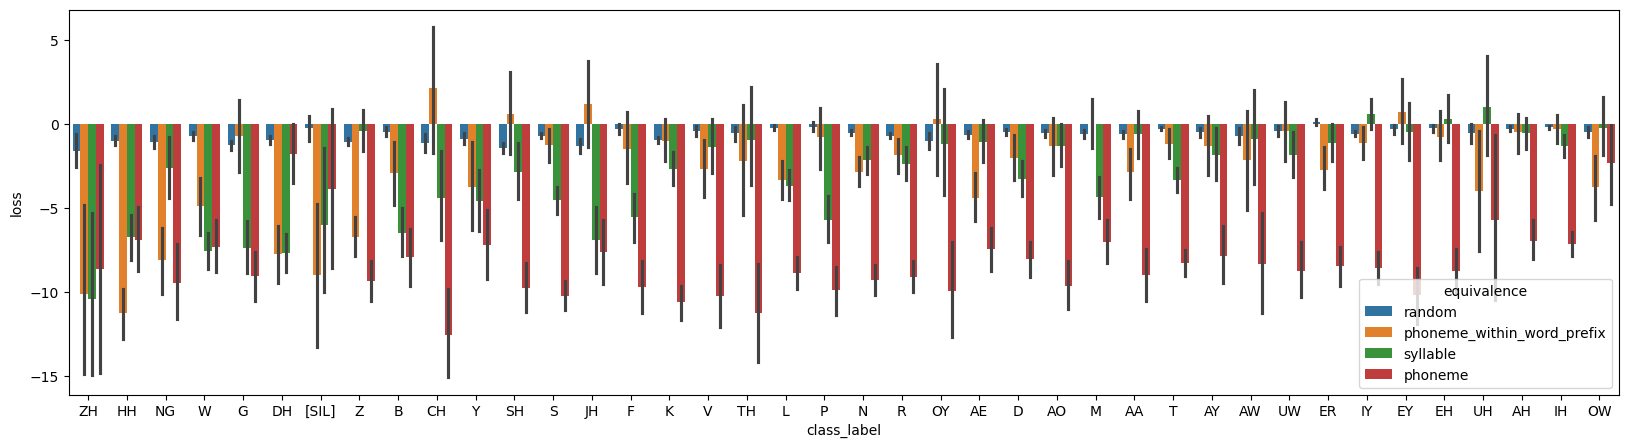

In [4]:
sort_order = loss_df.groupby("class_label")["loss"].mean().sort_values().index

f, ax = plt.subplots(figsize=(20, 5))
sns.barplot(data=loss_df.reset_index(), x="class_label", y="loss", hue="equivalence", order=sort_order, ax=ax)

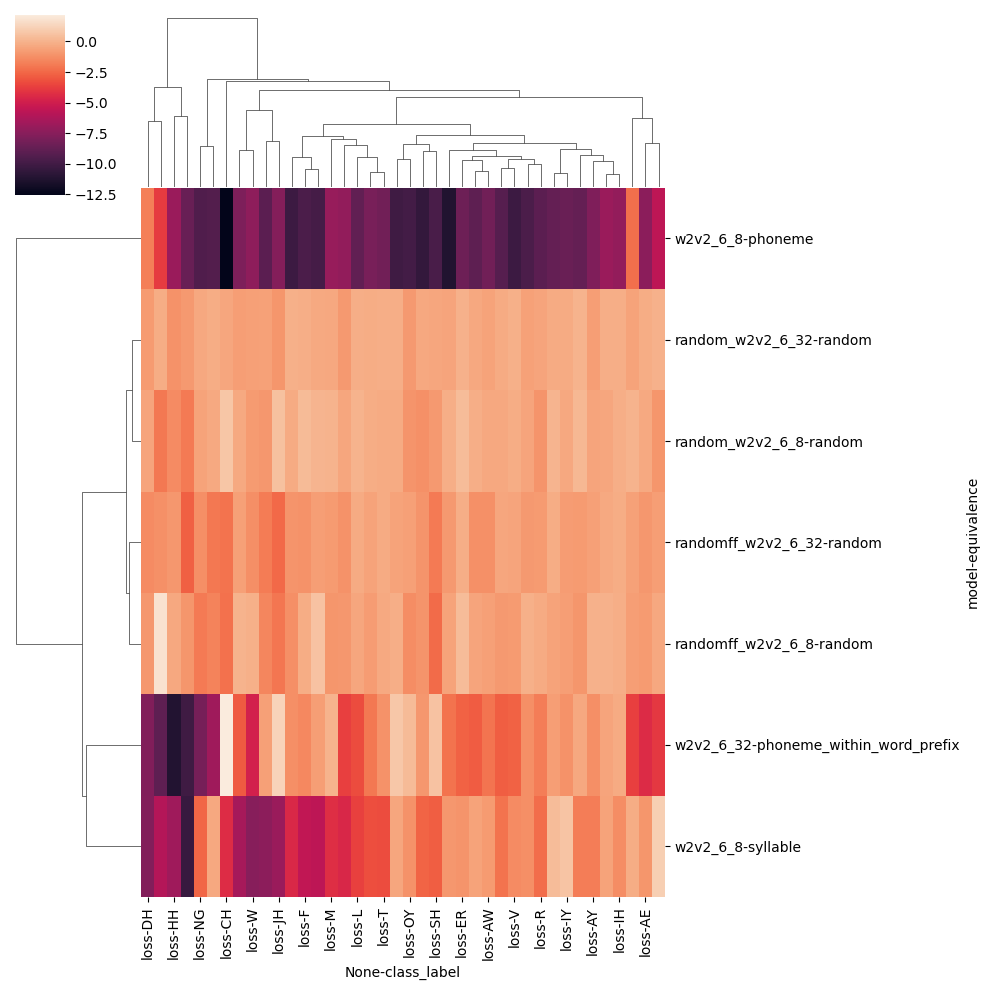

In [5]:
sns.clustermap(loss_df.groupby(["model", "equivalence", "class_label"]).loss.mean().reset_index() \
    .pivot(index=["model", "equivalence"], columns=["class_label"]))

<Axes: xlabel='phoneme_within_word_prefix', ylabel='phoneme'>

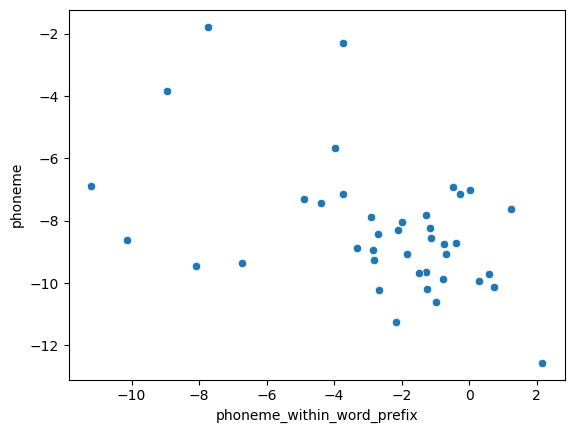

In [6]:
compare_pair = ["phoneme_within_word_prefix", "phoneme"]
paired_df = loss_df.loc[(slice(None), compare_pair), :].groupby(["equivalence", "class_label"]).loss.mean().reset_index() \
    .pivot(index=["class_label"], columns=["equivalence"], values=["loss"])
paired_df.columns = paired_df.columns.droplevel(0)
sns.scatterplot(data=paired_df, x=compare_pair[0], y=compare_pair[1])

In [7]:
compare_pair = ["phoneme_within_word_suffix", "next_phoneme"]
paired_df = loss_df.loc[(slice(None), compare_pair), :].groupby(["equivalence", "class_label"]).mean().reset_index() \
    .pivot(index=["class_label"], columns=["equivalence"], values=["loss"])
paired_df.columns = paired_df.columns.droplevel(0)
sns.scatterplot(data=paired_df, x=compare_pair[0], y=compare_pair[1])

KeyError: 'phoneme_within_word_suffix'